# WINE DATA

In [49]:
# 1) 라이브러리 임포트 및 설정
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
# 2) 데이터 로드
# 원격 CSV를 읽어와서 DataFrame으로 저장합니다. index_col=0으로 첫 열을 인덱스로 사용합니다.
wine_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"
wine = pd.read_csv(wine_url, sep=",", index_col=0)
# 데이터 상위 5행을 표시하여 컬럼과 값 구조를 확인합니다.
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [51]:
# 3) 타깃(label)과 특징(features) 분리
# 컬럼 'color'를 타깃으로 사용하고 나머지는 특징 행렬로 사용합니다.
wine_y = wine["color"]
wine_X = wine.drop(["color"], axis=1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
# 4) 표준화 (PCA 전처리 권장)
# StandardScaler로 평균을 0, 분산을 1로 맞춥니다. PCA는 입력 스케일에 민감하므로 권장되는 전처리입니다.
wine_ss = StandardScaler().fit_transform(wine_X)
# 표준화된 데이터의 앞부분을 출력하여 결과를 확인합니다.
print(wine_ss[:3])

[[ 0.14247327  2.18883292 -2.19283252 -0.7447781   0.56995782 -1.10013986
  -1.44635852  1.03499282  1.81308951  0.19309677 -0.91546416 -0.93722961]
 [ 0.45103572  3.28223494 -2.19283252 -0.59764007  1.1979747  -0.31132009
  -0.86246863  0.70148631 -0.11507303  0.99957862 -0.58006813 -0.93722961]
 [ 0.45103572  2.55330026 -1.91755268 -0.66069923  1.02669737 -0.87476278
  -1.09248586  0.76818761  0.25811972  0.79795816 -0.58006813 -0.93722961]]


In [53]:
# 5) PCA 적용을 위한 헬퍼 함수 정의
# 입력: 표준화된 데이터(ss_data), 보존할 주성분 개수(n_components)
# 출력: 투영된 주성분 좌표, 학습된 PCA 객체
def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)  # 주성분(분산을 최대화하는 축)을 학습
    return pca.transform(ss_data), pca  # 투영 결과와 pca 객체 반환

In [54]:
# 6) PCA 실행 (2개 성분)
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print(pca_wine.shape)  # 예: (샘플수, 2)

(6497, 2)


In [55]:
# 7) PCA 분산비 출력 (각 주성분이 설명하는 분산 비율)
def print_variance_ratio(pca):
    print("variance_ratio:", pca.explained_variance_ratio_)
    print("sum of variance_ratio", np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio: [0.25346226 0.22082117]
sum of variance_ratio 0.47428342743236207


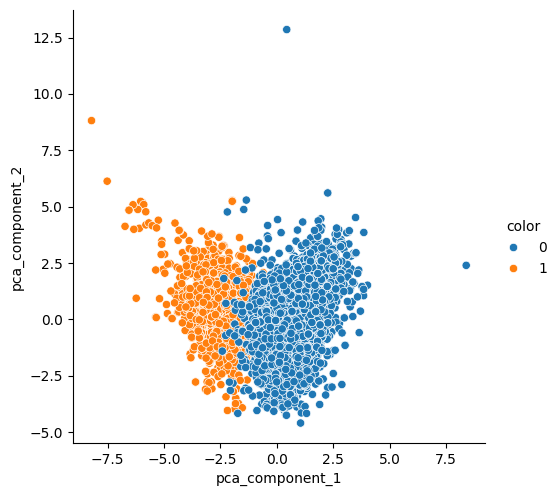

In [56]:
# 8) 시각화 준비 및 pairplot 출력
# PCA 투영 결과를 DataFrame으로 만들고 원래의 타깃 라벨을 합칩니다.
pca_columns = ["pca_component_1", "pca_component_2"]
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
# 색상(타깃) 컬럼을 추가합니다.
pca_wine_pd["color"] = wine_y.values

# pairplot으로 두 주성분의 분포를 시각화합니다. hue로 클래스(색)를 구분합니다.
sns.pairplot(
    pca_wine_pd,
    hue="color",
    height=5,
    x_vars=["pca_component_1"],
    y_vars=["pca_component_2"],
)
plt.show()

In [57]:
# 9) Random Forest에 적용했을때 원 데이터와 큰 차이가 없다

# 9.1) RandomForest 교차검증 함수 정의 및 필요한 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def rf_scores(X, y, cv=5):
    """RandomForest를 사용하여 교차검증을 수행하고 평균 정확도를 출력합니다."""
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring="accuracy", cv=cv)
    print("Score :", np.mean(scores_rf))

# 9.2) 원본(표준화된) 입력에 대한 성능
rf_scores(wine_ss, wine_y)

# 9.3) PCA(2개 성분) 투영 결과에 대한 성능(비교용)
pca_df = pd.DataFrame(pca_wine, columns=["pca_component_1", "pca_component_2"])
rf_scores(pca_df, wine_y)


Score : 0.9935352638124
Score : 0.981067803635933
Score : 0.981067803635933


In [58]:
# 10) 주 성분 3개로 표현해달라고 했더니, 98% 이상을 표현할 수 있다고 한다

# 10.1) PCA 3성분 적용 및 분산비 확인
pca_wine_3, pca3 = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca3)

variance_ratio: [0.25346226 0.22082117 0.13679223]
sum of variance_ratio 0.6110756621838704


In [59]:
# 10.2) DataFrame 생성 및 RandomForest 성능 비교
cols = ["pca_1", "pca_2", "pca_3"]
pca_wine_pd3 = pd.DataFrame(pca_wine_3, columns=cols)
pca_wine_pd3["color"] = wine_y.values

pca_X = pca_wine_pd3[cols]
rf_scores(pca_X, wine_y)

Score : 0.9832236631728548


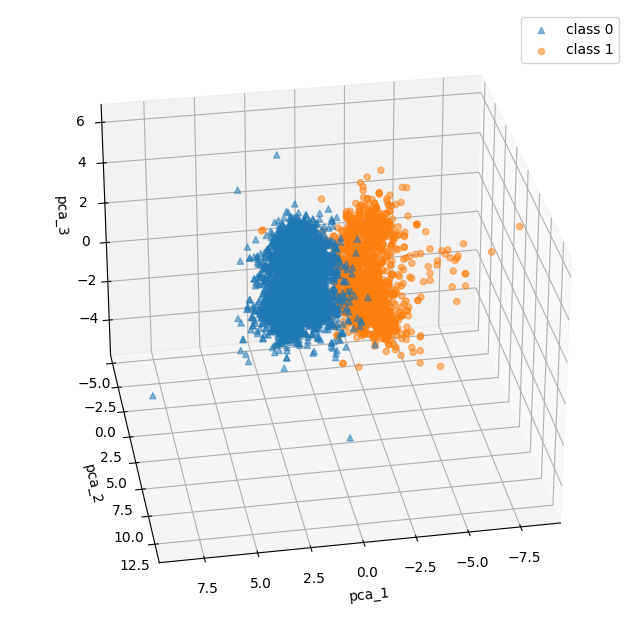

In [60]:
# 10.3) 3D 시각화
from mpl_toolkits.mplot3d import Axes3D

markers = ["^", "o"]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_pd3[pca_wine_pd3["color"] == i]["pca_1"]
    y_axis_data = pca_wine_pd3[pca_wine_pd3["color"] == i]["pca_2"]
    z_axis_data = pca_wine_pd3[pca_wine_pd3["color"] == i]["pca_3"]
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker, label=f"class {i}")

ax.view_init(30, 80)
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
ax.legend()
plt.show()


In [64]:
# 11) Plotly로 3D 상호작용 플롯 그리기 (옵션)
# (인터랙티브한 3D 보기: 브라우저 또는 노트북의 Plotly 지원 환경에서 작동합니다.)
import plotly.graph_objs as go

# pca_wine_pd3가 존재하면 그것을 사용하고, 없다면 pca_wine_3/pca_wine_pd3를 생성합니다.
try:
    df_plot = pca_wine_pd3
except NameError:
    cols = ["pca_1", "pca_2", "pca_3"]
    df_plot = pd.DataFrame(pca_wine_3, columns=cols)
    df_plot["color"] = wine_y.values

# 클래스별로 별도의 trace를 만들어 각 클래스에 다른 마커 속성(심볼, 색, 투명도)을 적용합니다.
classes = sorted(df_plot["color"].unique())

# 두 클래스 모두 더 투명하게 설정하여 서로를 가리지 않도록 함
trace_props = {}
if len(classes) >= 1:
    trace_props[classes[0]] = dict(name=f"class {classes[0]}", marker=dict(size=5, symbol='square', color='blue', opacity=0.22))
if len(classes) >= 2:
    trace_props[classes[1]] = dict(name=f"class {classes[1]}", marker=dict(size=6, symbol='circle', color='orange', opacity=0.22))
# 추가 클래스가 있으면 비슷한 방식으로 확장 가능

data = []
for c in classes:
    d = df_plot[df_plot["color"] == c]
    props = trace_props.get(c, dict(name=f"class {c}", marker=dict(size=5, opacity=0.22)))
    trace = go.Scatter3d(
        x=d["pca_1"],
        y=d["pca_2"],
        z=d["pca_3"],
        mode='markers',
        name=props['name'],
        marker=props['marker']
    )
    data.append(trace)

fig = go.Figure(data=data)
fig.update_layout(title="Wine PCA (3 components) - Interactive 3D", width=900, height=650, margin=dict(l=0, r=0, b=0, t=30))
fig.show()